In [ ]:
from google.colab import files
uploaded = files.upload()


Saving gym_members_exercise_tracking.csv to gym_members_exercise_tracking.csv


Data Preparation


In [ ]:
import pandas as pd
data = pd.read_csv('gym_members_exercise_tracking.csv')  # Adjust path if needed
data = data.head(100)
print("Data Shape:", data.shape)
print("First few rows of data:")
print(data.head())


Data Shape: (100, 15)
First few rows of data:
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (d

Data Cleaning ,
**Filling the missing values**


In [ ]:
# Check for missing values
missing_data = data.isnull().sum()
print("Missing values in each column:\n", missing_data)

# Fill missing values in numerical columns with mean
numeric_data = data.select_dtypes(include=['number'])  # Select only numerical columns
data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())  # Fill NaNs with mean for numeric columns

# Fill missing values in categorical columns with mode
for column in data.select_dtypes(include='object').columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)
print("Data Shape after cleaning:", data.shape)

Missing values in each column:
 Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64
Data Shape after cleaning: (100, 15)


<ipython-input-5-60657fa37687>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


Feature Engineering

In [ ]:
# Display all column names in the dataset
print("Column names in the dataset:", data.columns)


Column names in the dataset: Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')


In [ ]:
# Categorizing session duration in hours into 'short', 'medium', or 'long'
data['workout_duration_category'] = pd.cut(data['Session_Duration (hours)'],
                                           bins=[0, 0.5, 1, 2],
                                           labels=['short', 'medium', 'long'])

# Display the new feature along with the original duration column
print(data[['Session_Duration (hours)', 'workout_duration_category']].head())


   Session_Duration (hours) workout_duration_category
0                      1.69                      long
1                      1.30                      long
2                      1.11                      long
3                      0.59                    medium
4                      0.64                    medium


Mean,Mode,Median

In [ ]:
# Filter only numeric columns for mean, median, and other calculations
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute summary statistics
summary_stats = numeric_data.describe().T  # Transpose for easier reading

# Adding mean, median, and mode
summary_stats['mean'] = numeric_data.mean()
summary_stats['median'] = numeric_data.median()
summary_stats['mode'] = numeric_data.mode().iloc[0]  # Take the first mode value for each column

# Display the summary statistics table
print("Summary Statistics for Each Numeric Feature:")
print(summary_stats)


Summary Statistics for Each Numeric Feature:
                               count      mean         std     min      25%  \
Age                            100.0   37.9100   12.219454   18.00   26.750   
Weight (kg)                    100.0   74.0100   23.040046   40.50   57.600   
Height (m)                     100.0    1.6940    0.109341    1.51    1.610   
Max_BPM                        100.0  178.3800   11.191429  160.00  169.000   
Avg_BPM                        100.0  146.9400   13.802957  122.00  135.000   
Resting_BPM                    100.0   62.1100    7.027931   50.00   57.000   
Session_Duration (hours)       100.0    1.2573    0.322098    0.56    1.080   
Calories_Burned                100.0  926.0600  268.296753  363.00  742.750   
Fat_Percentage                 100.0   25.6110    6.114165   10.20   21.400   
Water_Intake (liters)          100.0    2.6260    0.597743    1.50    2.200   
Workout_Frequency (days/week)  100.0    3.2500    0.903137    2.00    3.000   
Experie

EDA Histogram

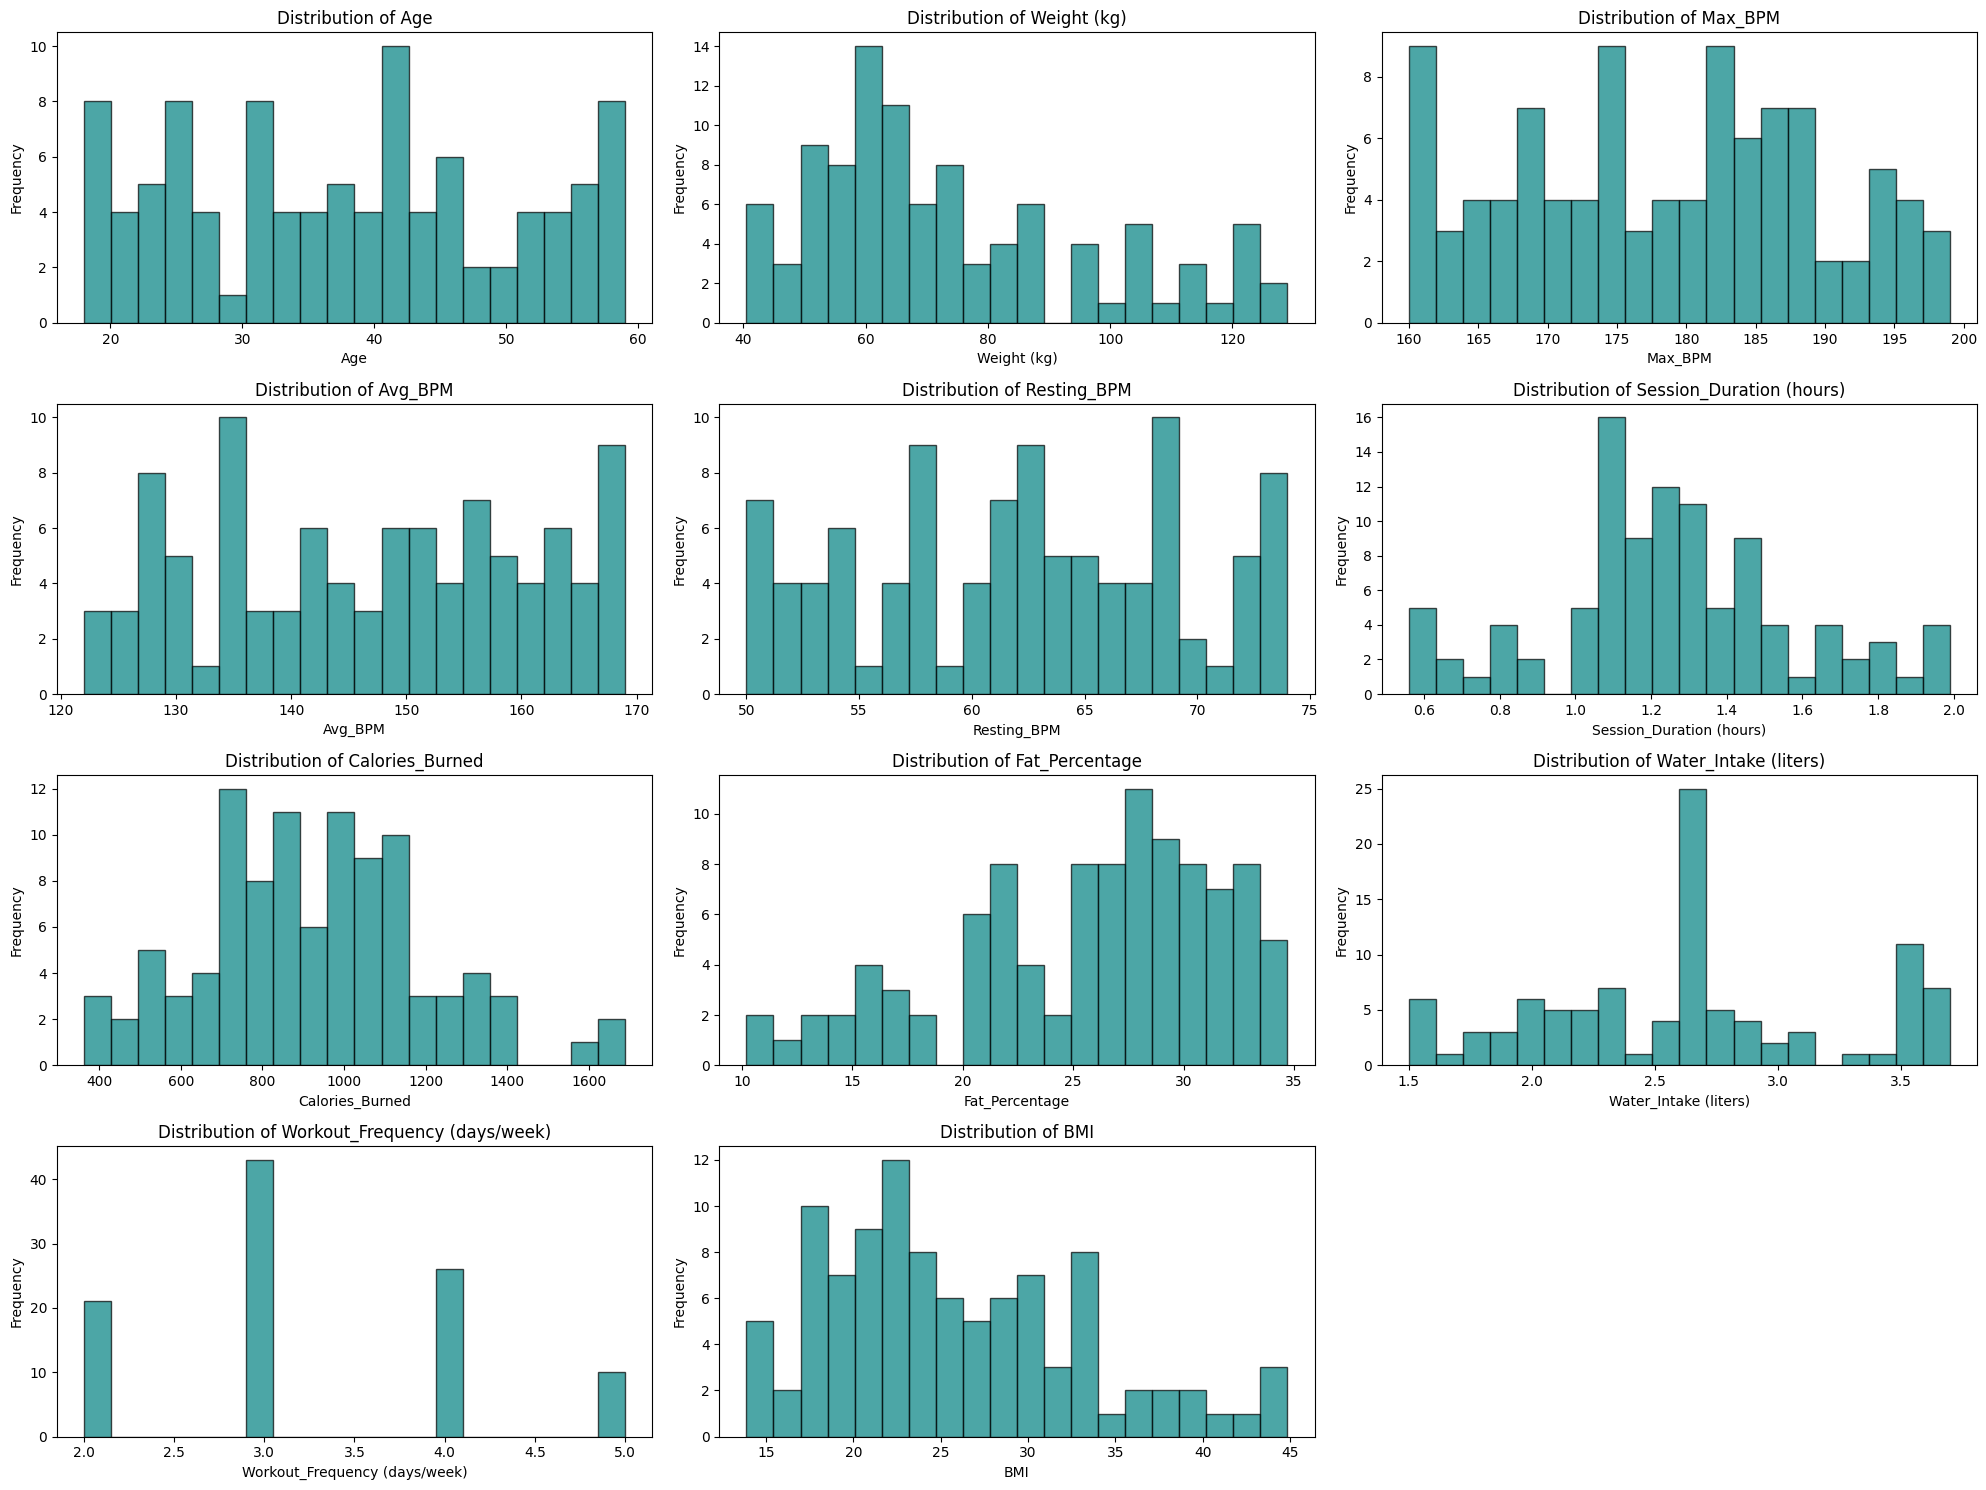

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing data distributions with histograms for numerical features
numerical_features = ['Age', 'Weight (kg)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
                      'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
                      'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    plt.hist(data[feature].dropna(), bins=20, alpha=0.7, color='teal', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Correlation heatmap

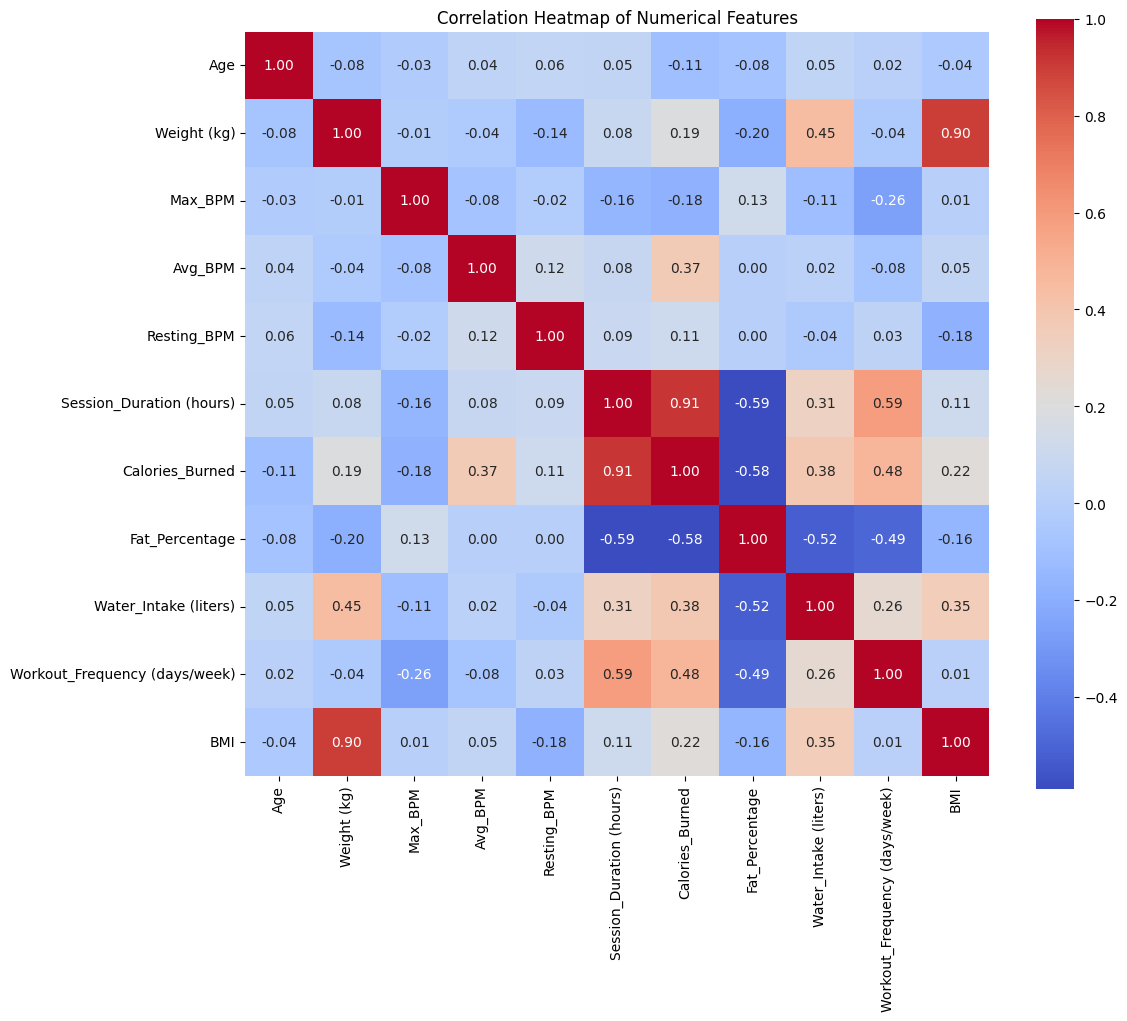

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for correlation analysis
numerical_features = ['Age', 'Weight (kg)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
                      'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
                      'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']

# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Example target variable (choose what you want to predict, e.g., 'Calories_Burned')
target = 'Calories_Burned'
# Features to use as predictors (excluding the target)
features = ['Age', 'Weight (kg)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
            'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)',
            'Workout_Frequency (days/week)', 'BMI']

# Splitting data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Displaying coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 3159.97
R^2 Score: 0.96
                               Coefficient
Age                              -3.777489
Weight (kg)                       0.431612
Max_BPM                          -0.273128
Avg_BPM                           5.724161
Resting_BPM                       1.404231
Session_Duration (hours)        707.969012
Fat_Percentage                   -2.969974
Water_Intake (liters)            22.524501
Workout_Frequency (days/week)   -11.793933
BMI                               1.922676
